# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***



<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.5067, 0.2321, 0.2463, 0.6471, 0.4226, 0.7532],
        [0.0381, 0.2131, 0.0380, 0.6008, 0.4051, 0.2892],
        [0.7129, 0.7027, 0.6333, 0.5201, 0.0111, 0.9064],
        [0.5096, 0.8384, 0.0035, 0.4050, 0.7835, 0.0625]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.4367)

In [9]:
b.mean(axis=0)

tensor([0.4418, 0.4966, 0.2303, 0.5432, 0.4056, 0.5028])

We can add an extra dimension with a size of 1 using unsqueeze().

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [13]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [14]:
#b+a

In [15]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [16]:
b+A

tensor([[1.5067, 1.2321, 1.2463, 1.6471, 1.4226, 1.7532],
        [1.0381, 1.2131, 1.0380, 1.6008, 1.4051, 1.2892],
        [1.7129, 1.7027, 1.6333, 1.5201, 1.0111, 1.9064],
        [1.5096, 1.8384, 1.0035, 1.4050, 1.7835, 1.0625]])

We can change the order of the dimensions in a tensor with `.permute()

In [17]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.6746, 0.2708, 0.8237, 0.1247, 0.8086, 0.8743],
         [0.3111, 0.1766, 0.6043, 0.9279, 0.1488, 0.7610],
         [0.6779, 0.2906, 0.7821, 0.6257, 0.3723, 0.1268],
         [0.9505, 0.7890, 0.9998, 0.5421, 0.1820, 0.8477]],

        [[0.6184, 0.9500, 0.1167, 0.5169, 0.0032, 0.5984],
         [0.7271, 0.8528, 0.4303, 0.2968, 0.4861, 0.4541],
         [0.8477, 0.8154, 0.1650, 0.9929, 0.8927, 0.9831],
         [0.6551, 0.9091, 0.4264, 0.4784, 0.2422, 0.3401]],

        [[0.2933, 0.4524, 0.2685, 0.7481, 0.2141, 0.6305],
         [0.9843, 0.9409, 0.8506, 0.1394, 0.1409, 0.6272],
         [0.8381, 0.3471, 0.6694, 0.4089, 0.1170, 0.0163],
         [0.8130, 0.4008, 0.3279, 0.6593, 0.6626, 0.3454]]])

In [18]:
b.shape

torch.Size([3, 4, 6])

In [19]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [20]:
b = torch.rand(10)
b

tensor([0.1008, 0.0326, 0.5783, 0.4748, 0.2531, 0.8787, 0.3395, 0.4335, 0.4516,
        0.3236])

In [21]:
torch.cuda.is_available()

False

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [23]:
b

tensor([0.1008, 0.0326, 0.5783, 0.4748, 0.2531, 0.8787, 0.3395, 0.4335, 0.4516,
        0.3236])

In [24]:
b = b.to(device)

In [25]:
b

tensor([0.1008, 0.0326, 0.5783, 0.4748, 0.2531, 0.8787, 0.3395, 0.4335, 0.4516,
        0.3236])

In [26]:
b = b.to("cpu")
b

tensor([0.1008, 0.0326, 0.5783, 0.4748, 0.2531, 0.8787, 0.3395, 0.4335, 0.4516,
        0.3236])

In [27]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [28]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [29]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training a model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [30]:
fn = "../data/animal_speed.npy"

In [31]:
speed = np.load(fn)
speed = speed[0:100]

In [32]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

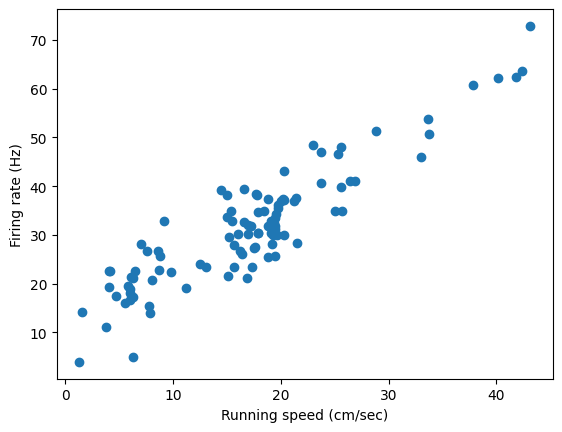

In [33]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$

We will create our model by defining a class. 

There are simpler ways to create simple models in pytorch. But the way presented here is the very flexible. We can create all our models by just modifying our class.

<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [34]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

In [35]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [36]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[0.4660]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.7391], requires_grad=True)


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [37]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [38]:
import torch.optim as optim

In [39]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

### Correct data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

The first dimension (rows) is for the observations.

We only have 1 input feature (speed), so the second dimension will have a size of 1.

In [40]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [41]:
X.shape

torch.Size([100, 1])

In [42]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [43]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[0.4660]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.7391], requires_grad=True)


In [44]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


In [45]:
yhat = lin_model(X)

In [46]:
loss = loss_fn(yhat,y)

In [47]:
optimizer.zero_grad() # zero the gradients

In [48]:
loss.backward() # calculate gradients

In [49]:
optimizer.step() # will change the model parameters to reduce the loss        

In [50]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.3760]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.7850], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [51]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [52]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 81.15827178955078
Epoch: 1, Loss: 48.29475021362305
Epoch: 2, Loss: 46.20021057128906
Epoch: 3, Loss: 46.05100631713867
Epoch: 4, Loss: 46.024803161621094
Epoch: 5, Loss: 46.00639343261719
Epoch: 6, Loss: 45.988487243652344
Epoch: 7, Loss: 45.97063064575195
Epoch: 8, Loss: 45.952789306640625
Epoch: 9, Loss: 45.934967041015625
Epoch: 1000, Loss: 34.08623504638672
Epoch: 2000, Loss: 29.037405014038086
Epoch: 3000, Loss: 26.914871215820312
Epoch: 4000, Loss: 26.022571563720703
Epoch: 5000, Loss: 25.647449493408203
Epoch: 6000, Loss: 25.48974609375
Epoch: 7000, Loss: 25.423446655273438
Epoch: 8000, Loss: 25.39557647705078
Epoch: 9000, Loss: 25.38385772705078
Epoch: 10000, Loss: 25.37893295288086
Epoch: 11000, Loss: 25.376863479614258
Epoch: 12000, Loss: 25.375986099243164
Epoch: 13000, Loss: 25.375627517700195
Epoch: 14000, Loss: 25.375473022460938
Epoch: 15000, Loss: 25.375408172607422
Epoch: 16000, Loss: 25.375381469726562
Epoch: 17000, Loss: 25.375368118286133
Epoch: 180

In [53]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5679], requires_grad=True)


In [54]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [55]:
lin_yhat = lin_model(t_range)

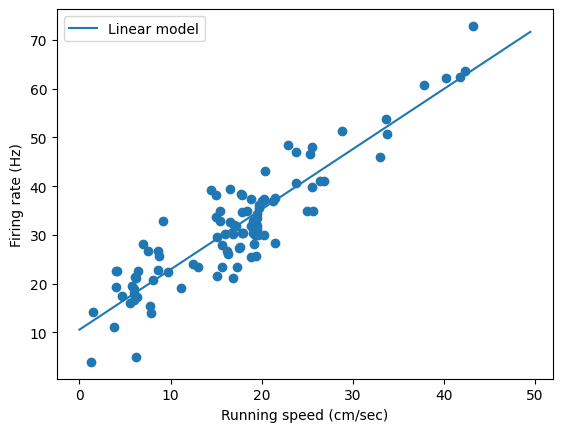

In [56]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

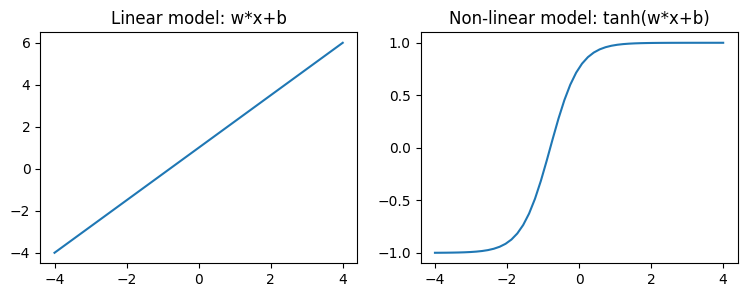

In [57]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [58]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [59]:
nn_model = NN_model()

In [60]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.6538],
        [-0.0687],
        [ 0.8695],
        [ 0.5216],
        [ 0.7519]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.1350,  0.8052, -0.6030,  0.5456,  0.4963], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.4322, -0.4398, -0.1561, -0.4269,  0.3764]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.2351], requires_grad=True)


In [61]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [62]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [63]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1141.4652099609375
Epoch: 1, Loss: 1132.34375
Epoch: 2, Loss: 1128.087158203125
Epoch: 3, Loss: 1124.8121337890625
Epoch: 4, Loss: 1121.91455078125
Epoch: 5, Loss: 1119.2071533203125
Epoch: 6, Loss: 1116.6119384765625
Epoch: 7, Loss: 1114.0894775390625
Epoch: 8, Loss: 1111.6181640625
Epoch: 9, Loss: 1109.184814453125
Epoch: 1000, Loss: 232.2644500732422
Epoch: 2000, Loss: 120.24368286132812
Epoch: 3000, Loss: 90.58956909179688
Epoch: 4000, Loss: 72.81491088867188
Epoch: 5000, Loss: 62.796688079833984
Epoch: 6000, Loss: 63.39915084838867
Epoch: 7000, Loss: 64.93254852294922
Epoch: 8000, Loss: 63.726951599121094
Epoch: 9000, Loss: 56.73271560668945
Epoch: 10000, Loss: 47.39036560058594
Epoch: 11000, Loss: 41.813175201416016
Epoch: 12000, Loss: 38.87548828125
Epoch: 13000, Loss: 37.04941177368164
Epoch: 14000, Loss: 35.606502532958984
Epoch: 15000, Loss: 34.38573455810547
Epoch: 16000, Loss: 33.42744445800781
Epoch: 17000, Loss: 32.70558547973633
Epoch: 18000, Loss: 32.093

In [64]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.1121],
        [-0.1734],
        [ 0.8672],
        [ 0.0582],
        [ 0.7211]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 1.1257,  4.6903, -0.7145,  0.5092,  0.3997], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ -9.8439, -10.5129,   9.2435,   8.9503,   9.7593]],
       requires_grad=True)
layer2.bias Parameter containing:
tensor([9.1399], requires_grad=True)


### Let's compare our linear model with our small neural network

In [65]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [66]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

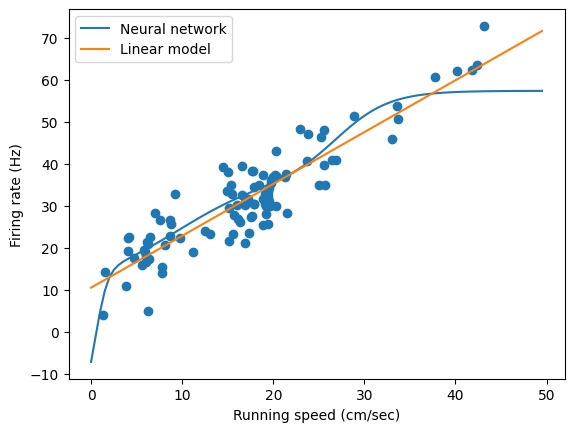

In [67]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [68]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


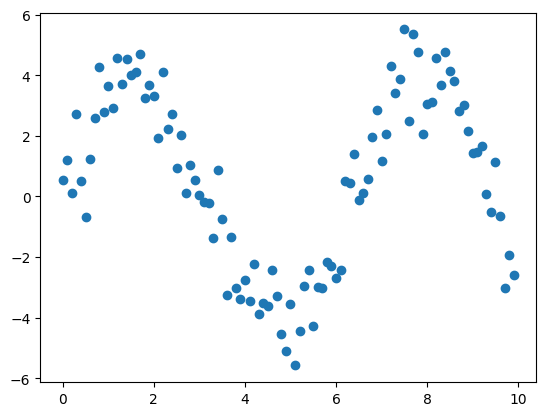

In [69]:
plt.scatter(X.numpy(),y.numpy())

In [70]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 319.3418273925781
Epoch: 1, Loss: 24.259326934814453
Epoch: 2, Loss: 21.1698055267334
Epoch: 3, Loss: 18.676406860351562
Epoch: 4, Loss: 16.645225524902344
Epoch: 5, Loss: 14.982125282287598
Epoch: 6, Loss: 13.618111610412598
Epoch: 7, Loss: 12.500571250915527
Epoch: 8, Loss: 11.587828636169434
Epoch: 9, Loss: 10.845724105834961
Epoch: 1000, Loss: 6.04578971862793
Epoch: 2000, Loss: 5.829845428466797
Epoch: 3000, Loss: 5.5810441970825195
Epoch: 4000, Loss: 4.976471424102783
Epoch: 5000, Loss: 4.568141460418701
Epoch: 6000, Loss: 4.168846130371094
Epoch: 7000, Loss: 3.7740185260772705
Epoch: 8000, Loss: 3.460097312927246
Epoch: 9000, Loss: 3.258544683456421
Epoch: 10000, Loss: 3.1288092136383057
Epoch: 11000, Loss: 3.039435386657715
Epoch: 12000, Loss: 2.9679019451141357
Epoch: 13000, Loss: 2.8958263397216797
Epoch: 14000, Loss: 2.8088173866271973
Epoch: 15000, Loss: 2.7022485733032227
Epoch: 16000, Loss: 2.587902307510376
Epoch: 17000, Loss: 2.587768316268921
Epoch: 180

In [71]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 279.77838134765625
Epoch: 1, Loss: 247.3787841796875
Epoch: 2, Loss: 219.18301391601562
Epoch: 3, Loss: 194.64515686035156
Epoch: 4, Loss: 173.29039001464844
Epoch: 5, Loss: 154.7053985595703
Epoch: 6, Loss: 138.5305938720703
Epoch: 7, Loss: 124.45304870605469
Epoch: 8, Loss: 112.20044708251953
Epoch: 9, Loss: 101.53582763671875
Epoch: 1000, Loss: 16.48593521118164
Epoch: 2000, Loss: 11.32788372039795
Epoch: 3000, Loss: 9.41624641418457
Epoch: 4000, Loss: 8.707767486572266
Epoch: 5000, Loss: 8.445196151733398
Epoch: 6000, Loss: 8.347883224487305
Epoch: 7000, Loss: 8.31181812286377
Epoch: 8000, Loss: 8.298452377319336
Epoch: 9000, Loss: 8.293498992919922
Epoch: 10000, Loss: 8.291662216186523
Epoch: 11000, Loss: 8.290982246398926
Epoch: 12000, Loss: 8.290730476379395
Epoch: 13000, Loss: 8.29063606262207
Epoch: 14000, Loss: 8.29060173034668
Epoch: 15000, Loss: 8.290589332580566
Epoch: 16000, Loss: 8.290584564208984
Epoch: 17000, Loss: 8.290582656860352
Epoch: 18000, Loss: 

In [72]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [73]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

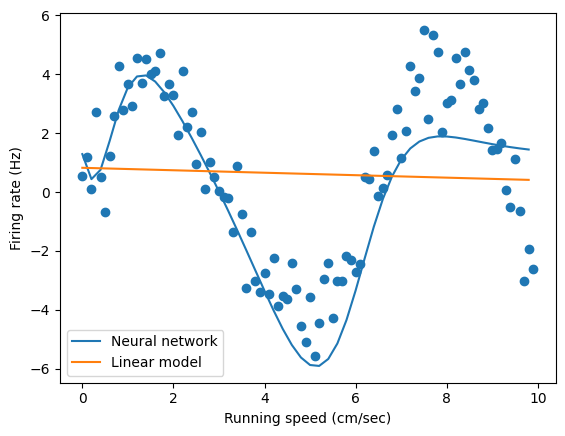

In [74]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

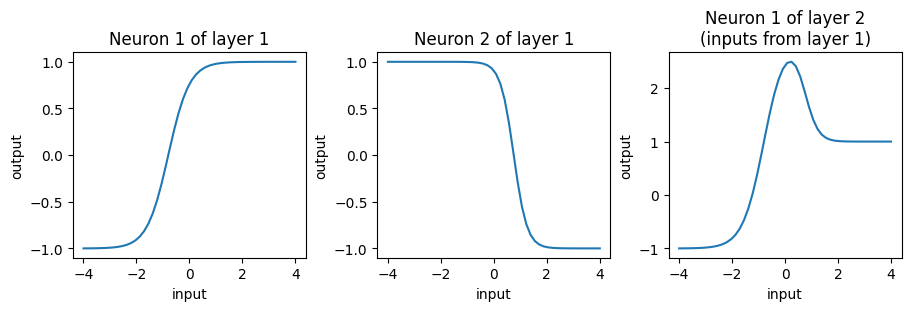

In [75]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [76]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [77]:
dnn_model = DNN_model()

In [78]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.9097],
        [-0.3787],
        [-0.4274],
        [-0.5963],
        [-0.6272],
        [ 0.1499],
        [ 0.3479],
        [ 0.0169],
        [ 0.1691],
        [ 0.9387]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.3893, -0.2554, -0.5327, -0.3436, -0.1843, -0.5293, -0.7926,  0.7967,
         0.8197, -0.3090], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.1447, -0.1920,  0.2285,  0.3143, -0.0885, -0.0759,  0.3158,  0.0755,
          0.2846, -0.2690],
        [-0.1770,  0.0469,  0.0288, -0.1236,  0.2058,  0.3122, -0.1188,  0.1985,
         -0.0287,  0.2648],
        [ 0.2924,  0.0356, -0.1860,  0.0840, -0.0269, -0.2267, -0.1999, -0.2120,
         -0.2358,  0.0173],
        [-0.3070, -0.1353,  0.0774,  0.1338,  0.1916, -0.2311, -0.2991, -0.0977,
          0.1059, -0.1252],
        [ 0.1794,  0.0528,  0.0656,  0.0926,  0.0168,  0.1832, -0.0460, -0.0967,
         -0.0736,  0.2922],
        [-0

In [79]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [80]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 9.07816219329834
Epoch: 1, Loss: 9.067771911621094
Epoch: 2, Loss: 9.057585716247559
Epoch: 3, Loss: 9.04759693145752
Epoch: 4, Loss: 9.037803649902344
Epoch: 5, Loss: 9.028202056884766
Epoch: 6, Loss: 9.018784523010254
Epoch: 7, Loss: 9.00954818725586
Epoch: 8, Loss: 9.00049114227295
Epoch: 9, Loss: 8.991607666015625
Epoch: 1000, Loss: 7.925908088684082
Epoch: 2000, Loss: 7.076638221740723
Epoch: 3000, Loss: 5.88671875
Epoch: 4000, Loss: 3.876666784286499
Epoch: 5000, Loss: 2.837728500366211
Epoch: 6000, Loss: 2.5073013305664062
Epoch: 7000, Loss: 2.369309902191162
Epoch: 8000, Loss: 2.2831907272338867
Epoch: 9000, Loss: 2.221804618835449
Epoch: 10000, Loss: 2.1750903129577637
Epoch: 11000, Loss: 2.1379592418670654
Epoch: 12000, Loss: 2.1075098514556885
Epoch: 13000, Loss: 2.081756830215454
Epoch: 14000, Loss: 2.059034824371338
Epoch: 15000, Loss: 2.0376715660095215
Epoch: 16000, Loss: 2.015629529953003
Epoch: 17000, Loss: 1.9897263050079346
Epoch: 18000, Loss: 1.95394

In [81]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

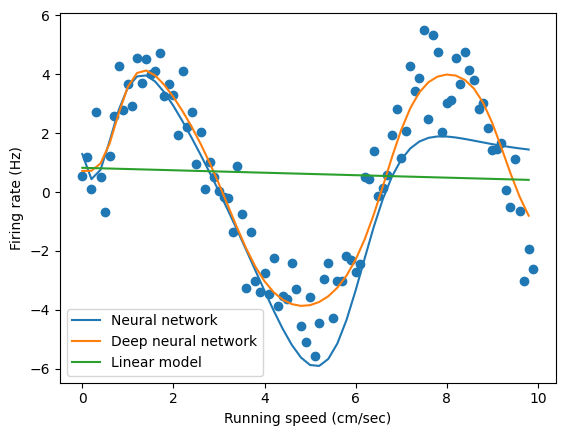

In [82]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.